<a href="https://colab.research.google.com/github/Zerberuz/evaluaciones_python_202520/blob/main/Evaluacion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluacion 4
## Python aplicado a la Ingeniería 202520
**Docente:** Miguel Ortiz

**Estudiante:** Camilo Ernesto Calderin Ogaza

**email:** camilo.calderino@upb.edu.co

**Fecha:** 24/09/2025


AJUSTANDO ZONAS HORARIAS...
Datos filtrados para el año 2022: 8760 registros
Datos filtrados para el año 2022: 8760 registros


=== ESTADÍSTICAS DESCRIPTIVAS - DUBAI ===

--- GHI ---
Media: 247.46 W/m²
Mediana: 0.00 W/m²
Desviación Estándar: 325.39 W/m²
Mínimo: 0.00 W/m²
Máximo: 1063.00 W/m²
Radiación promedio diaria: 247.46 W/m²
Radiación promedio mensual: 247.50 W/m²
Radiación promedio anual: 247.46 W/m²
Hora de máxima radiación (local): 12:00
Hora de mínima radiación (local): 4:00

--- DHI ---
Media: 100.50 W/m²
Mediana: 0.00 W/m²
Desviación Estándar: 131.38 W/m²
Mínimo: 0.00 W/m²
Máximo: 662.00 W/m²
Radiación promedio diaria: 100.50 W/m²
Radiación promedio mensual: 100.29 W/m²
Radiación promedio anual: 100.50 W/m²
Hora de máxima radiación (local): 12:00
Hora de mínima radiación (local): 4:00

--- DNI ---
Media: 217.54 W/m²
Mediana: 0.00 W/m²
Desviación Estándar: 285.11 W/m²
Mínimo: 0.00 W/m²
Máximo: 941.00 W/m²
Radiación promedio diaria: 217.54 W/m²
Radiación promedio mensual: 218

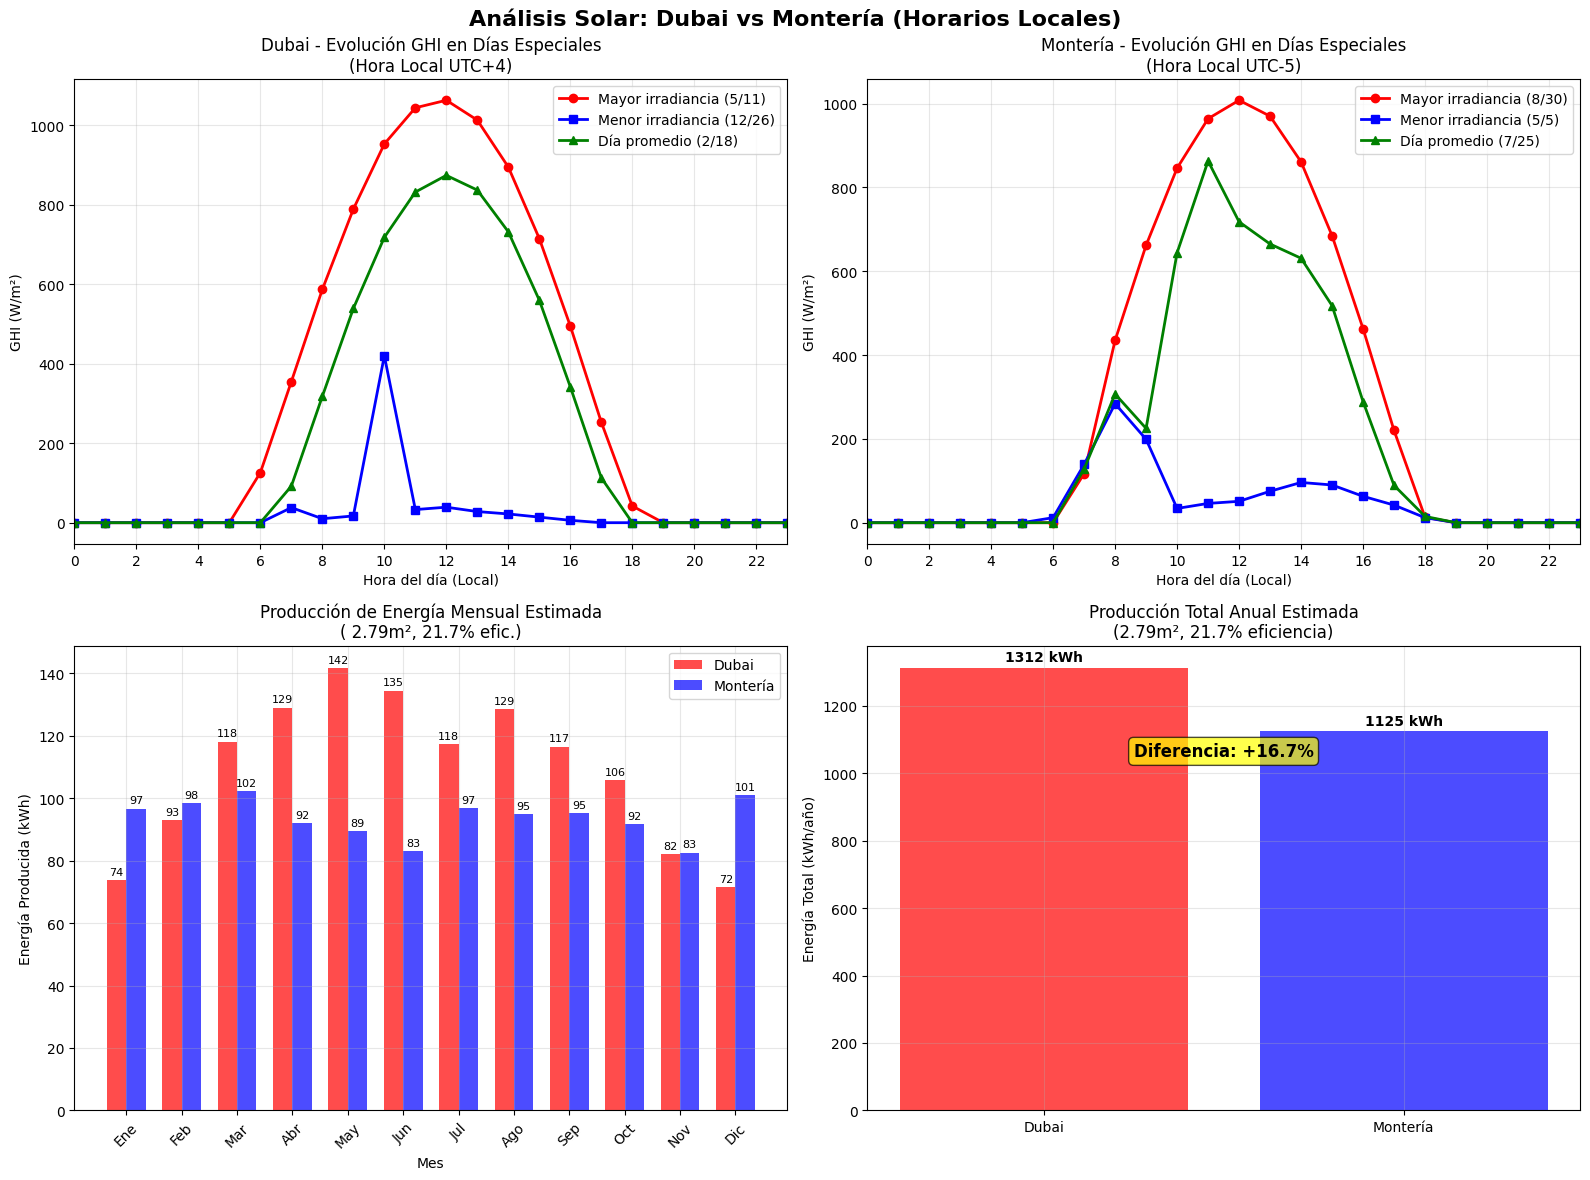



=== TABLA COMPARATIVA DUBAI vs MONTERÍA ===
Parámetro                           Dubai           Montería        Diferencia     
GHI Promedio (W/m²)                 247.46          212.03          16.7          %
GHI Máximo (W/m²)                   1063.00         1014.00         4.8           %
Hora Pico Solar (Local)             12             :00 12             :00 0              hrs
Temperatura Promedio (°C)           29.21           27.81           1.40          °C

--- INDICADORES ENERGÉTICOS ---
Producción Anual (kWh)              1312.43         1124.52         16.7          %



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#cargar datos
def cargar_datos(nombre_archivo):
    return pd.read_csv(nombre_archivo)
#ajustar zona horaria
def ajustar_zona_horaria(df, ubicacion):
    df_ajustado = df.copy()

    if ubicacion.lower() == 'dubai':
        offset = 4  # Dubai UTC+4
    elif ubicacion.lower() == 'monteria':
        offset = -5  # Montería UTC-5
    else:
        offset = 0

    df_ajustado['Hour_Local'] = (df_ajustado['Hour'] + offset) % 24
    return df_ajustado
#datos filtrados 2022
def filtrar_datos_2022(df):
    año_disponible = df['Year'].max()
    df_filtrado = df[df['Year'] == año_disponible].copy()
    print(f"Datos filtrados para el año {año_disponible}: {len(df_filtrado)} registros")
    return df_filtrado
#calcular estadisticas descriptivas
def calcular_estadisticas_descriptivas(df, ubicacion):
    print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS - {ubicacion.upper()} ===")

    variables_radiacion = ['GHI', 'DHI', 'DNI']
    estadisticas = {}
    #bucle para cada variable de radiacion
    for variable in variables_radiacion:
        if variable in df.columns:
            print(f"\n--- {variable} ---")

            # calculos estadísticas básicas
            media = df[variable].mean()
            mediana = df[variable].median()
            std = df[variable].std()
            minimo = df[variable].min()
            maximo = df[variable].max()

            print(f"Media: {media:.2f} W/m²")
            print(f"Mediana: {mediana:.2f} W/m²")
            print(f"Desviación Estándar: {std:.2f} W/m²")
            print(f"Mínimo: {minimo:.2f} W/m²")
            print(f"Máximo: {maximo:.2f} W/m²")

            # Radiación promedio por diferentes períodos
            radiacion_diaria = df.groupby(['Month', 'Day'])[variable].mean().mean()
            radiacion_mensual = df.groupby('Month')[variable].mean()
            radiacion_anual = df[variable].mean()

            print(f"Radiación promedio diaria: {radiacion_diaria:.2f} W/m²")
            print(f"Radiación promedio mensual: {radiacion_mensual.mean():.2f} W/m²")
            print(f"Radiación promedio anual: {radiacion_anual:.2f} W/m²")

            # Hora de máxima y mínima radiación
            hora_max_local = df.loc[df[variable].idxmax(), 'Hour_Local']
            hora_min_local = df.loc[df[variable].idxmin(), 'Hour_Local']
            print(f"Hora de máxima radiación (local): {hora_max_local}:00")
            print(f"Hora de mínima radiación (local): {hora_min_local}:00")
            #almacenar estadisticas en el diccionario
            estadisticas[variable] = {
                'media': media,
                'mediana': mediana,
                'std': std,
                'min': minimo,
                'max': maximo,
                'radiacion_mensual': radiacion_mensual,
                'hora_max': hora_max_local,
                'hora_min': hora_min_local
            }

    # Temperatura
    if 'Temperature' in df.columns:
        print(f"\n--- TEMPERATURE ---")
        temp_media = df['Temperature'].mean()
        temp_min = df['Temperature'].min()
        temp_max = df['Temperature'].max()
        print(f"Temperatura media: {temp_media:.2f} °C")
        print(f"Temperatura mínima: {temp_min:.2f} °C")
        print(f"Temperatura máxima: {temp_max:.2f} °C")

        estadisticas['Temperature'] = {
            'media': temp_media,
            'min': temp_min,
            'max': temp_max
        }

    return estadisticas
#calculo de indicadores clave
def calcular_indicadores_clave(df, ubicacion):
    print(f"\n=== INDICADORES CLAVE - {ubicacion.upper()} ===")
    if 'GHI' not in df.columns:
        print("No se encontró la columna GHI")
        return {}
    # Energía total disponible
    energia_total_wh = df['GHI'].sum()  # Wh/m²
    energia_total_kwh = energia_total_wh / 1000  # kWh/m²

    # Por períodos
    dias_en_año = len(df) / 24
    energia_diaria = energia_total_kwh / dias_en_año
    energia_mensual = energia_diaria * 30
    energia_anual = energia_total_kwh

    print(f"Energía total disponible:")
    print(f"  - Por día: {energia_diaria:.2f} kWh/m²")
    print(f"  - Por mes: {energia_mensual:.2f} kWh/m²")
    print(f"  - Por año: {energia_anual:.2f} kWh/m²")

    # Cálculo de producción con el panel
    potencia_panel = 0.540  # kW
    area_panel = 2.79     # m²
    eficiencia = 0.217  # 21.7%

    # Energía producida = Radiación * Área * Eficiencia
    energia_producida_diaria = energia_diaria * area_panel * eficiencia
    energia_producida_mensual = energia_mensual * area_panel * eficiencia
    energia_producida_anual = energia_anual * area_panel * eficiencia

    print(f"\nPotencial energético ({area_panel}m², {eficiencia*100:.1f}% efic.):")
    print(f"  - Por día: {energia_producida_diaria:.2f} kWh")
    print(f"  - Por mes: {energia_producida_mensual:.2f} kWh")
    print(f"  - Por año: {energia_producida_anual:.2f} kWh")

    return {
        'energia_diaria': energia_diaria,
        'energia_mensual': energia_mensual,
        'energia_anual': energia_anual,
        'produccion_diaria': energia_producida_diaria,
        'produccion_mensual': energia_producida_mensual,
        'produccion_anual': energia_producida_anual
    }
#identificar dias especiales
def identificar_dias_especiales(df):
    if 'GHI' not in df.columns:
        return None, None, None

    # Agrupar por día y calcular irradiancia total diaria
    radiacion_diaria = df.groupby(['Month', 'Day'])['GHI'].sum().reset_index()
    radiacion_diaria['total_diaria'] = radiacion_diaria['GHI']

    # Encontrar días especiales max, min, promedio
    idx_max = radiacion_diaria['total_diaria'].idxmax()
    idx_min = radiacion_diaria['total_diaria'].idxmin()

    promedio_diario = radiacion_diaria['total_diaria'].mean()
    idx_promedio = (radiacion_diaria['total_diaria'] - promedio_diario).abs().idxmin()

    dia_max = radiacion_diaria.iloc[idx_max]
    dia_min = radiacion_diaria.iloc[idx_min]
    dia_promedio = radiacion_diaria.iloc[idx_promedio]
    return dia_max, dia_min, dia_promedio
#crear visualizaciones graficas requeridas
def crear_visualizaciones_requeridas(df_dubai, df_monteria):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis Solar: Dubai vs Montería (Horarios Locales)', fontsize=16, fontweight='bold')

    # 1. EVOLUCIÓN DE RADIACIÓN DURANTE UN DÍA (3 días especiales)
    print("Creando gráfico 1: Evolución de radiación durante un día...")

    # Identificar días especiales para Dubai
    dia_max_d, dia_min_d, dia_prom_d = identificar_dias_especiales(df_dubai)

    if dia_max_d is not None:
        # Extraer datos de los días especiales
        datos_dia_max = df_dubai[(df_dubai['Month'] == dia_max_d['Month']) &
                                (df_dubai['Day'] == dia_max_d['Day'])]
        datos_dia_min = df_dubai[(df_dubai['Month'] == dia_min_d['Month']) &
                                (df_dubai['Day'] == dia_min_d['Day'])]
        datos_dia_prom = df_dubai[(df_dubai['Month'] == dia_prom_d['Month']) &
                                 (df_dubai['Day'] == dia_prom_d['Day'])]

        # Ordenar por hora local para gráfico
        datos_dia_max = datos_dia_max.sort_values('Hour_Local')
        datos_dia_min = datos_dia_min.sort_values('Hour_Local')
        datos_dia_prom = datos_dia_prom.sort_values('Hour_Local')

        # Gráfico para Dubai (USANDO HORA LOCAL)
        if 'GHI' in df_dubai.columns:
            axes[0,0].plot(datos_dia_max['Hour_Local'], datos_dia_max['GHI'],
                          marker='o', linewidth=2, color='red',
                          label=f'Mayor irradiancia ({dia_max_d["Month"]}/{dia_max_d["Day"]})')
            axes[0,0].plot(datos_dia_min['Hour_Local'], datos_dia_min['GHI'],
                          marker='s', linewidth=2, color='blue',
                          label=f'Menor irradiancia ({dia_min_d["Month"]}/{dia_min_d["Day"]})')
            axes[0,0].plot(datos_dia_prom['Hour_Local'], datos_dia_prom['GHI'],
                          marker='^', linewidth=2, color='green',
                          label=f'Día promedio ({dia_prom_d["Month"]}/{dia_prom_d["Day"]})')

            axes[0,0].set_title('Dubai - Evolución GHI en Días Especiales\n(Hora Local UTC+4)')
            axes[0,0].set_xlabel('Hora del día (Local)')
            axes[0,0].set_ylabel('GHI (W/m²)')
            axes[0,0].legend()
            axes[0,0].grid(True, alpha=0.3)
            axes[0,0].set_xticks(range(0, 24, 2))
            axes[0,0].set_xlim(0, 23)

    # Identificar días especiales para Montería
    dia_max_m, dia_min_m, dia_prom_m = identificar_dias_especiales(df_monteria)

    if dia_max_m is not None:
        datos_dia_max_m = df_monteria[(df_monteria['Month'] == dia_max_m['Month']) &
                                     (df_monteria['Day'] == dia_max_m['Day'])]
        datos_dia_min_m = df_monteria[(df_monteria['Month'] == dia_min_m['Month']) &
                                     (df_monteria['Day'] == dia_min_m['Day'])]
        datos_dia_prom_m = df_monteria[(df_monteria['Month'] == dia_prom_m['Month']) &
                                      (df_monteria['Day'] == dia_prom_m['Day'])]

        # Ordenar por hora local
        datos_dia_max_m = datos_dia_max_m.sort_values('Hour_Local')
        datos_dia_min_m = datos_dia_min_m.sort_values('Hour_Local')
        datos_dia_prom_m = datos_dia_prom_m.sort_values('Hour_Local')

        # Gráfico para Montería (USANDO HORA LOCAL)
        if 'GHI' in df_monteria.columns:
            axes[0,1].plot(datos_dia_max_m['Hour_Local'], datos_dia_max_m['GHI'],
                          marker='o', linewidth=2, color='red',
                          label=f'Mayor irradiancia ({dia_max_m["Month"]}/{dia_max_m["Day"]})')
            axes[0,1].plot(datos_dia_min_m['Hour_Local'], datos_dia_min_m['GHI'],
                          marker='s', linewidth=2, color='blue',
                          label=f'Menor irradiancia ({dia_min_m["Month"]}/{dia_min_m["Day"]})')
            axes[0,1].plot(datos_dia_prom_m['Hour_Local'], datos_dia_prom_m['GHI'],
                          marker='^', linewidth=2, color='green',
                          label=f'Día promedio ({dia_prom_m["Month"]}/{dia_prom_m["Day"]})')

            axes[0,1].set_title('Montería - Evolución GHI en Días Especiales\n(Hora Local UTC-5)')
            axes[0,1].set_xlabel('Hora del día (Local)')
            axes[0,1].set_ylabel('GHI (W/m²)')
            axes[0,1].legend()
            axes[0,1].grid(True, alpha=0.3)
            axes[0,1].set_xticks(range(0, 24, 2))
            axes[0,1].set_xlim(0, 23)

    # 2. PRODUCCIÓN DE ENERGÍA MENSUAL ESTIMADA (kWh)
    print("Creando gráfico 2: Producción de energía mensual estimada...")

    if 'GHI' in df_dubai.columns and 'GHI' in df_monteria.columns:

        eficiencia = 0.217  # 21.7%
        area = 2.79       # m²

        # Energía mensual (kWh/m²)
        energia_mensual_dubai = df_dubai.groupby('Month')['GHI'].sum() / 1000  # kWh/m²
        energia_mensual_monteria = df_monteria.groupby('Month')['GHI'].sum() / 1000

        # Producción estimada con panel
        produccion_dubai = energia_mensual_dubai * eficiencia * area
        produccion_monteria = energia_mensual_monteria * eficiencia * area

        meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

        x = np.arange(1, len(produccion_dubai) + 1)
        width = 0.35

        axes[1,0].bar(x - width/2, produccion_dubai.values, width,
                     label='Dubai', color='red', alpha=0.7)
        axes[1,0].bar(x + width/2, produccion_monteria.values, width,
                     label='Montería', color='blue', alpha=0.7)

        # Añadir valores en las barras
        for i, (d_val, m_val) in enumerate(zip(produccion_dubai.values, produccion_monteria.values)):
            axes[1,0].text(i+1 - width/2, d_val + 1, f'{d_val:.0f}',
                          ha='center', va='bottom', fontsize=8)
            axes[1,0].text(i+1 + width/2, m_val + 1, f'{m_val:.0f}',
                          ha='center', va='bottom', fontsize=8)
        axes[1,0].set_title(f'Producción de Energía Mensual Estimada\n( {area}m², {eficiencia*100:.1f}% efic.)')
        axes[1,0].set_xlabel('Mes')
        axes[1,0].set_ylabel('Energía Producida (kWh)')
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels([meses[i-1] for i in x], rotation=45)
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

    # 3. COMPARACIÓN ANUAL TOTAL
    print("Creando gráfico 3: Comparación anual total...")

    if 'GHI' in df_dubai.columns and 'GHI' in df_monteria.columns:
        # Totales anuales
        total_anual_dubai = produccion_dubai.sum()
        total_anual_monteria = produccion_monteria.sum()

        ubicaciones = ['Dubai', 'Montería']
        totales = [total_anual_dubai, total_anual_monteria]
        colores = ['red', 'blue']
        bars = axes[1,1].bar(ubicaciones, totales, color=colores, alpha=0.7)

        # Añadir valores en las barras
        for bar, total in zip(bars, totales):
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 10,
                          f'{total:.0f} kWh', ha='center', va='bottom', fontweight='bold')

        axes[1,1].set_title(f'Producción Total Anual Estimada\n({area}m², {eficiencia*100:.1f}% eficiencia)')
        axes[1,1].set_ylabel('Energía Total (kWh/año)')
        axes[1,1].grid(True, alpha=0.3)

        # Añadir diferencia porcentual
        diferencia_pct = ((total_anual_dubai - total_anual_monteria) / total_anual_monteria) * 100
        axes[1,1].text(0.5, max(totales) * 0.8,
                      f'Diferencia: {diferencia_pct:+.1f}%',
                      ha='center', fontsize=12, fontweight='bold',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    plt.tight_layout()
    plt.show()

def crear_tabla_comparativa(stats_dubai, stats_monteria, indicadores_dubai, indicadores_monteria):
    print(f"\n=== TABLA COMPARATIVA DUBAI vs MONTERÍA ===")
    print(f"{'Parámetro':<35} {'Dubai':<15} {'Montería':<15} {'Diferencia':<15}")
    print("=" * 80)

    # Comparaciones de radiación
    if 'GHI' in stats_dubai and 'GHI' in stats_monteria:
        ghi_d = stats_dubai['GHI']['media']
        ghi_m = stats_monteria['GHI']['media']
        diff_ghi = ((ghi_d - ghi_m) / ghi_m) * 100
        print(f"{'GHI Promedio (W/m²)':<35} {ghi_d:<15.2f} {ghi_m:<15.2f} {diff_ghi:<14.1f}%")

        max_d = stats_dubai['GHI']['max']
        max_m = stats_monteria['GHI']['max']
        diff_max = ((max_d - max_m) / max_m) * 100
        print(f"{'GHI Máximo (W/m²)':<35} {max_d:<15.2f} {max_m:<15.2f} {diff_max:<14.1f}%")

        hora_max_d = stats_dubai['GHI']['hora_max']
        hora_max_m = stats_monteria['GHI']['hora_max']
        print(f"{'Hora Pico Solar (Local)':<35} {hora_max_d:<15.0f}:00 {hora_max_m:<15.0f}:00 {abs(hora_max_d-hora_max_m):<14.0f} hrs")

    # Comparaciones de temperatura
    if 'Temperature' in stats_dubai and 'Temperature' in stats_monteria:
        temp_d = stats_dubai['Temperature']['media']
        temp_m = stats_monteria['Temperature']['media']
        diff_temp = temp_d - temp_m
        print(f"{'Temperatura Promedio (°C)':<35} {temp_d:<15.2f} {temp_m:<15.2f} {diff_temp:<14.2f}°C")

    # Comparaciones energéticas
    if indicadores_dubai and indicadores_monteria:
        print("\n--- INDICADORES ENERGÉTICOS ---")

        prod_d = indicadores_dubai['produccion_anual']
        prod_m = indicadores_monteria['produccion_anual']
        diff_prod = ((prod_d - prod_m) / prod_m) * 100
        print(f"{'Producción Anual (kWh)':<35} {prod_d:<15.2f} {prod_m:<15.2f} {diff_prod:<14.1f}%")

# PROGRAMA PRINCIPAL
if __name__ == "__main__":
    # Cargar datos
    datos_dubai = cargar_datos("dubai_2022.csv")
    datos_monteria = cargar_datos("monteria_2022.csv")

    # Ajustar zonas horarias antes de filtrar
    print("\n" + "=" * 70)
    print("AJUSTANDO ZONAS HORARIAS...")
    datos_dubai = ajustar_zona_horaria(datos_dubai, 'dubai')
    datos_monteria = ajustar_zona_horaria(datos_monteria, 'monteria')

    # Filtrar datos del último año
    dubai_filtrado = filtrar_datos_2022(datos_dubai)
    monteria_filtrado = filtrar_datos_2022(datos_monteria)

    # 1. Análisis estadístico
    print("\n" + "=" * 70)
    stats_dubai = calcular_estadisticas_descriptivas(dubai_filtrado, "Dubai")
    stats_monteria = calcular_estadisticas_descriptivas(monteria_filtrado, "Montería")

    # 2. Indicadores clave
    print("\n" + "=" * 70)
    indicadores_dubai = calcular_indicadores_clave(dubai_filtrado, "Dubai")
    indicadores_monteria = calcular_indicadores_clave(monteria_filtrado, "Montería")

    # 3. Visualizaciones requeridas
    print("\n" + "=" * 70)
    crear_visualizaciones_requeridas(dubai_filtrado, monteria_filtrado)

    # 4. Comparación en tabla
    print("\n" + "=" * 70)
    crear_tabla_comparativa(stats_dubai, stats_monteria, indicadores_dubai, indicadores_monteria)

    print(f"\n{'='*70}")

SIMULACIÓN DE PANEL SOLAR JINKOSOLAR TIGER PRO 540W

Cargando datos...
Datos filtrados para el año 2022: 8760 registros
Datos filtrados para el año 2022: 8760 registros

EJECUTANDO SIMULACIONES...


=== REPORTE DETALLADO - PANEL JINKOSOLAR TIGER PRO 540W ===
Ubicación: Dubai
Tecnología: Monocristalino PERC

--- CARACTERÍSTICAS DEL PANEL ---
Potencia nominal (STC): 540 W
Área del panel: 2.79 m²
Eficiencia STC: 21.7%
Coeficiente de temperatura: -0.35%/°C
NOCT: 45°C

--- RESULTADOS ENERGÉTICOS ---
Energía total generada: 1179.41 kWh
Energía diaria promedio: 3.23 kWh/día
Energía mensual promedio: 96.94 kWh/mes
Energía anual estimada: 1163.25 kWh/año

--- RENDIMIENTO ---
Potencia promedio: 134.64 W
Potencia máxima: 550.05 W
Factor de capacidad: 24.93%

--- CONDICIONES DE OPERACIÓN ---
Eficiencia promedio real: 20.79%
Temperatura celda promedio: 36.9°C
Temperatura celda máxima: 71.7°C


=== REPORTE DETALLADO - PANEL JINKOSOLAR TIGER PRO 540W ===
Ubicación: Montería
Tecnología: Monocristalino

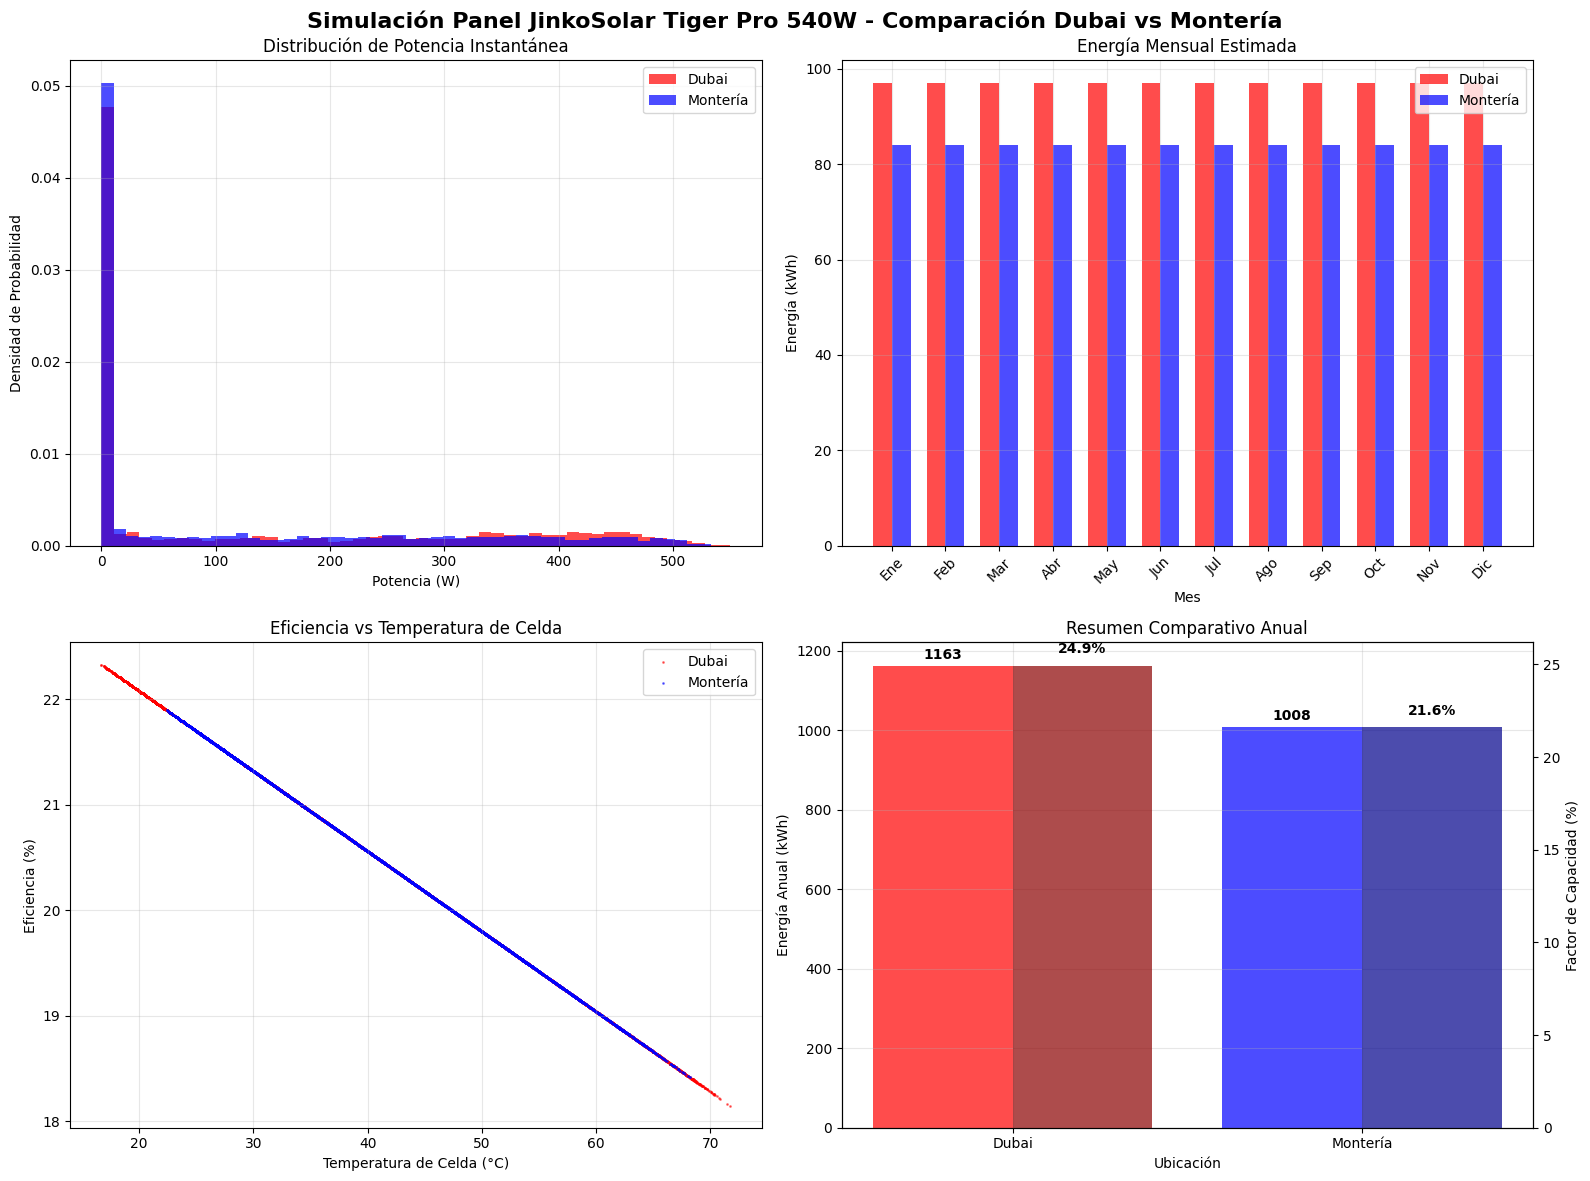


SIMULACIÓN COMPLETADA EXITOSAMENTE


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#clase para simulación de panel solar fotovoltaico
class PanelSolarFotovoltaico:
    def __init__(self):
        # Características técnicas del panel JinkoSolar Tiger Pro 72HC 540W
        self.potencia_nominal = 0.54  # kW
        self.area_panel = 2.79  # m²
        self.eficiencia_stc = 0.217  # 21.7% en condiciones STC
        self.tecnologia = "Monocristalino PERC"

        # Parámetros de temperatura
        self.coef_temperatura = -0.0035  # -0.35%/°C (coeficiente de potencia por temperatura)
        self.temp_nominal_operacion = 45.0  # °C (NOCT - Nominal Operating Cell Temperature)
        self.temp_stc = 25.0  # °C (temperatura en condiciones STC)

        # Condiciones STC (Standard Test Conditions)
        self.irradiancia_stc = 1000  # W/m²
        self.temp_stc = 25.0  # °C

        # Estadísticas de simulación
        self.energia_total_generada = 0.0
        self.horas_operacion = 0
    #metodo para calcular temperatura de celda
    def calcular_temperatura_celda(self, temperatura_ambiente, irradiancia):
        temp_celda = temperatura_ambiente + ((self.temp_nominal_operacion - 20) / 800) * irradiancia
        return temp_celda
    #metodo para calcular eficiencia real del panel
    def calcular_eficiencia_real(self, temperatura_celda):
        # Factor de corrección por temperatura
        factor_temp = 1 + self.coef_temperatura * (temperatura_celda - self.temp_stc)
        eficiencia_real = self.eficiencia_stc * factor_temp

        # Asegurar que la eficiencia no sea negativa
        return max(0, eficiencia_real)
    #metodo para calcular potencia instantanea del panel
    def calcular_potencia_instantanea(self, irradiancia, temperatura_ambiente):
        if irradiancia <= 0:
            return 0.0

        # Calcular temperatura de celda
        temp_celda = self.calcular_temperatura_celda(temperatura_ambiente, irradiancia)

        # Calcular eficiencia real
        eficiencia_real = self.calcular_eficiencia_real(temp_celda)

        # Calcular potencia: P = Irradiancia * Área * Eficiencia
        potencia = (irradiancia / 1000) * self.area_panel * eficiencia_real  # kW

        return potencia
    #calcular energia generada en un periodo
    def calcular_energia_periodo(self, df_datos, ubicacion=""):
        if 'GHI' not in df_datos.columns or 'Temperature' not in df_datos.columns:
            raise ValueError("El DataFrame debe contener las columnas 'GHI' y 'Temperature'")

        resultados = {
            'ubicacion': ubicacion,
            'potencias_instantaneas': [],
            'energias_horarias': [],
            'temperaturas_celda': [],
            'eficiencias_reales': []
        }
        energia_total = 0.0
        #diccionario para almacenar resultados
        for index, row in df_datos.iterrows():
            irradiancia = row['GHI']
            temp_ambiente = row['Temperature']

            # Calcular potencia instantánea
            potencia = self.calcular_potencia_instantanea(irradiancia, temp_ambiente)

            # Calcular energía horaria (asumiendo mediciones cada hora)
            energia_horaria = potencia  # kWh (potencia en kW * 1 hora)
            energia_total += energia_horaria

            # Calcular temperatura de celda y eficiencia para estadísticas
            temp_celda = self.calcular_temperatura_celda(temp_ambiente, irradiancia)
            eficiencia_real = self.calcular_eficiencia_real(temp_celda)

            # Guardar resultados
            resultados['potencias_instantaneas'].append(potencia)
            resultados['energias_horarias'].append(energia_horaria)
            resultados['temperaturas_celda'].append(temp_celda)
            resultados['eficiencias_reales'].append(eficiencia_real)

        # Convertir listas a arrays de numpy para facilitar cálculos
        resultados['potencias_instantaneas'] = np.array(resultados['potencias_instantaneas'])
        resultados['energias_horarias'] = np.array(resultados['energias_horarias'])
        resultados['temperaturas_celda'] = np.array(resultados['temperaturas_celda'])
        resultados['eficiencias_reales'] = np.array(resultados['eficiencias_reales'])

        # Calcular estadísticas
        resultados['energia_total_kwh'] = energia_total
        resultados['energia_diaria_promedio'] = energia_total / (len(df_datos) / 24)
        resultados['energia_mensual_promedio'] = resultados['energia_diaria_promedio'] * 30
        resultados['potencia_promedio'] = np.mean(resultados['potencias_instantaneas'])
        resultados['potencia_maxima'] = np.max(resultados['potencias_instantaneas'])
        resultados['eficiencia_promedio'] = np.mean(resultados['eficiencias_reales'])
        resultados['temp_celda_promedio'] = np.mean(resultados['temperaturas_celda'])
        resultados['temp_celda_maxima'] = np.max(resultados['temperaturas_celda'])

        # Factores de capacidad
        resultados['factor_capacidad'] = (resultados['potencia_promedio'] / self.potencia_nominal) * 100

        return resultados

    def generar_reporte_detallado(self, resultados):
        print(f"\n=== REPORTE DETALLADO - PANEL JINKOSOLAR TIGER PRO 540W ===")
        print(f"Ubicación: {resultados['ubicacion']}")
        print(f"Tecnología: {self.tecnologia}")
        print("=" * 70)

        print(f"\n--- CARACTERÍSTICAS DEL PANEL ---")
        print(f"Potencia nominal (STC): {self.potencia_nominal * 1000:.0f} W")
        print(f"Área del panel: {self.area_panel:.2f} m²")
        print(f"Eficiencia STC: {self.eficiencia_stc * 100:.1f}%")
        print(f"Coeficiente de temperatura: {self.coef_temperatura * 100:.2f}%/°C")
        print(f"NOCT: {self.temp_nominal_operacion:.0f}°C")

        print(f"\n--- RESULTADOS ENERGÉTICOS ---")
        print(f"Energía total generada: {resultados['energia_total_kwh']:.2f} kWh")
        print(f"Energía diaria promedio: {resultados['energia_diaria_promedio']:.2f} kWh/día")
        print(f"Energía mensual promedio: {resultados['energia_mensual_promedio']:.2f} kWh/mes")
        print(f"Energía anual estimada: {resultados['energia_mensual_promedio'] * 12:.2f} kWh/año")

        print(f"\n--- RENDIMIENTO ---")
        print(f"Potencia promedio: {resultados['potencia_promedio'] * 1000:.2f} W")
        print(f"Potencia máxima: {resultados['potencia_maxima'] * 1000:.2f} W")
        print(f"Factor de capacidad: {resultados['factor_capacidad']:.2f}%")

        print(f"\n--- CONDICIONES DE OPERACIÓN ---")
        print(f"Eficiencia promedio real: {resultados['eficiencia_promedio'] * 100:.2f}%")
        print(f"Temperatura celda promedio: {resultados['temp_celda_promedio']:.1f}°C")
        print(f"Temperatura celda máxima: {resultados['temp_celda_maxima']:.1f}°C")

    def crear_graficos_simulacion(self, resultados_dubai, resultados_monteria):
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Simulación Panel JinkoSolar Tiger Pro 540W - Comparación Dubai vs Montería',
                     fontsize=16, fontweight='bold')

        # 1. Distribución de potencias instantáneas
        axes[0,0].hist(resultados_dubai['potencias_instantaneas'] * 1000, bins=50,
                      alpha=0.7, color='red', label='Dubai', density=True)
        axes[0,0].hist(resultados_monteria['potencias_instantaneas'] * 1000, bins=50,
                      alpha=0.7, color='blue', label='Montería', density=True)
        axes[0,0].set_title('Distribución de Potencia Instantánea')
        axes[0,0].set_xlabel('Potencia (W)')
        axes[0,0].set_ylabel('Densidad de Probabilidad')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)

        # 2. Comparación de energía mensual
        meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

        # Calcular energía mensual (simplificado - dividir total entre 12)
        energia_mensual_dubai = [resultados_dubai['energia_mensual_promedio']] * 12
        energia_mensual_monteria = [resultados_monteria['energia_mensual_promedio']] * 12

        x = np.arange(len(meses))
        width = 0.35

        axes[0,1].bar(x - width/2, energia_mensual_dubai, width,
                     label='Dubai', color='red', alpha=0.7)
        axes[0,1].bar(x + width/2, energia_mensual_monteria, width,
                     label='Montería', color='blue', alpha=0.7)

        axes[0,1].set_title('Energía Mensual Estimada')
        axes[0,1].set_xlabel('Mes')
        axes[0,1].set_ylabel('Energía (kWh)')
        axes[0,1].set_xticks(x)
        axes[0,1].set_xticklabels(meses, rotation=45)
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # 3. Temperatura de celda vs Eficiencia
        axes[1,0].scatter(resultados_dubai['temperaturas_celda'],
                         resultados_dubai['eficiencias_reales'] * 100,
                         alpha=0.5, color='red', s=1, label='Dubai')
        axes[1,0].scatter(resultados_monteria['temperaturas_celda'],
                         resultados_monteria['eficiencias_reales'] * 100,
                         alpha=0.5, color='blue', s=1, label='Montería')
        axes[1,0].set_title('Eficiencia vs Temperatura de Celda')
        axes[1,0].set_xlabel('Temperatura de Celda (°C)')
        axes[1,0].set_ylabel('Eficiencia (%)')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # 4. Resumen comparativo
        ubicaciones = ['Dubai', 'Montería']
        energia_anual = [resultados_dubai['energia_mensual_promedio'] * 12,
                        resultados_monteria['energia_mensual_promedio'] * 12]
        factor_capacidad = [resultados_dubai['factor_capacidad'],
                           resultados_monteria['factor_capacidad']]

        ax4_twin = axes[1,1].twinx()

        bars1 = axes[1,1].bar([x - 0.2 for x in range(len(ubicaciones))], energia_anual,
                             width=0.4, color=['red', 'blue'], alpha=0.7, label='Energía Anual (kWh)')
        bars2 = ax4_twin.bar([x + 0.2 for x in range(len(ubicaciones))], factor_capacidad,
                            width=0.4, color=['darkred', 'darkblue'], alpha=0.7, label='Factor Capacidad (%)')

        axes[1,1].set_title('Resumen Comparativo Anual')
        axes[1,1].set_xlabel('Ubicación')
        axes[1,1].set_ylabel('Energía Anual (kWh)', color='black')
        ax4_twin.set_ylabel('Factor de Capacidad (%)', color='black')
        axes[1,1].set_xticks(range(len(ubicaciones)))
        axes[1,1].set_xticklabels(ubicaciones)

        # Añadir valores en las barras
        for bar, val in zip(bars1, energia_anual):
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 10,
                          f'{val:.0f}', ha='center', va='bottom', fontweight='bold')

        for bar, val in zip(bars2, factor_capacidad):
            height = bar.get_height()
            ax4_twin.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                         f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Función para cargar datos
def cargar_datos(nombre_archivo):
    return pd.read_csv(nombre_archivo)

def ajustar_zona_horaria(df, ubicacion):
    df_ajustado = df.copy()

    if ubicacion.lower() == 'dubai':
        offset = 4  # Dubai UTC+4
    elif ubicacion.lower() == 'monteria':
        offset = -5  # Montería UTC-5
    else:
        offset = 0

    df_ajustado['Hour_Local'] = (df_ajustado['Hour'] + offset) % 24
    return df_ajustado

def filtrar_datos_2024(df):
    año_disponible = df['Year'].max()
    df_filtrado = df[df['Year'] == año_disponible].copy()
    print(f"Datos filtrados para el año {año_disponible}: {len(df_filtrado)} registros")
    return df_filtrado

def crear_tabla_comparativa_simulacion(resultados_dubai, resultados_monteria):
    print(f"\n=== TABLA COMPARATIVA - SIMULACIÓN PANEL JINKOSOLAR 540W ===")
    print(f"{'Parámetro':<40} {'Dubai':<20} {'Montería':<20} {'Diferencia':<15}")
    print("=" * 95)

    # Energía
    energia_d = resultados_dubai['energia_mensual_promedio'] * 12
    energia_m = resultados_monteria['energia_mensual_promedio'] * 12
    diff_energia = ((energia_d - energia_m) / energia_m) * 100
    print(f"{'Energía Anual (kWh)':<40} {energia_d:<20.2f} {energia_m:<20.2f} {diff_energia:<14.1f}%")

    # Potencia promedio
    pot_d = resultados_dubai['potencia_promedio'] * 1000
    pot_m = resultados_monteria['potencia_promedio'] * 1000
    diff_pot = ((pot_d - pot_m) / pot_m) * 100
    print(f"{'Potencia Promedio (W)':<40} {pot_d:<20.2f} {pot_m:<20.2f} {diff_pot:<14.1f}%")

    # Factor de capacidad
    fc_d = resultados_dubai['factor_capacidad']
    fc_m = resultados_monteria['factor_capacidad']
    diff_fc = fc_d - fc_m
    print(f"{'Factor de Capacidad (%)':<40} {fc_d:<20.2f} {fc_m:<20.2f} {diff_fc:<14.2f}pp")

    # Eficiencia promedio
    eff_d = resultados_dubai['eficiencia_promedio'] * 100
    eff_m = resultados_monteria['eficiencia_promedio'] * 100
    diff_eff = eff_d - eff_m
    print(f"{'Eficiencia Promedio (%)':<40} {eff_d:<20.2f} {eff_m:<20.2f} {diff_eff:<14.2f}pp")

    # Temperatura de celda
    temp_d = resultados_dubai['temp_celda_promedio']
    temp_m = resultados_monteria['temp_celda_promedio']
    diff_temp = temp_d - temp_m
    print(f"{'Temp. Celda Promedio (°C)':<40} {temp_d:<20.1f} {temp_m:<20.1f} {diff_temp:<14.1f}°C")

# PROGRAMA PRINCIPAL PARA SIMULACIÓN
if __name__ == "__main__":
    print("SIMULACIÓN DE PANEL SOLAR JINKOSOLAR TIGER PRO 540W")
    print("=" * 80)

    # Crear instancia del panel
    panel = PanelSolarFotovoltaico()

    try:
        # Cargar y procesar datos
        print("\nCargando datos...")
        datos_dubai = cargar_datos("dubai_2022.csv")
        datos_monteria = cargar_datos("monteria_2022.csv")

        # Ajustar zonas horarias y filtrar
        datos_dubai = ajustar_zona_horaria(datos_dubai, 'dubai')
        datos_monteria = ajustar_zona_horaria(datos_monteria, 'monteria')

        dubai_filtrado = filtrar_datos_2024(datos_dubai)
        monteria_filtrado = filtrar_datos_2024(datos_monteria)

        print(f"\n" + "=" * 80)
        print("EJECUTANDO SIMULACIONES...")

        # Ejecutar simulaciones
        resultados_dubai = panel.calcular_energia_periodo(dubai_filtrado, "Dubai")
        resultados_monteria = panel.calcular_energia_periodo(monteria_filtrado, "Montería")

        # Generar reportes
        print(f"\n" + "=" * 80)
        panel.generar_reporte_detallado(resultados_dubai)

        print(f"\n" + "=" * 80)
        panel.generar_reporte_detallado(resultados_monteria)

        # Tabla comparativa
        print(f"\n" + "=" * 80)
        crear_tabla_comparativa_simulacion(resultados_dubai, resultados_monteria)

        # Gráficos
        print(f"\n" + "=" * 80)
        print("GENERANDO GRÁFICOS COMPARATIVOS...")
        panel.crear_graficos_simulacion(resultados_dubai, resultados_monteria)

        print(f"\n" + "=" * 80)
        print("SIMULACIÓN COMPLETADA EXITOSAMENTE")

    except FileNotFoundError as e:
        print(f"Error: No se encontraron los archivos de datos: {e}")
        print("Asegúrate de tener los archivos 'dubai_2022.csv' y 'monteria_2022.csv' en el directorio")
    except Exception as e:
        print(f"Error durante la simulación: {e}")